In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.shape

(178, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


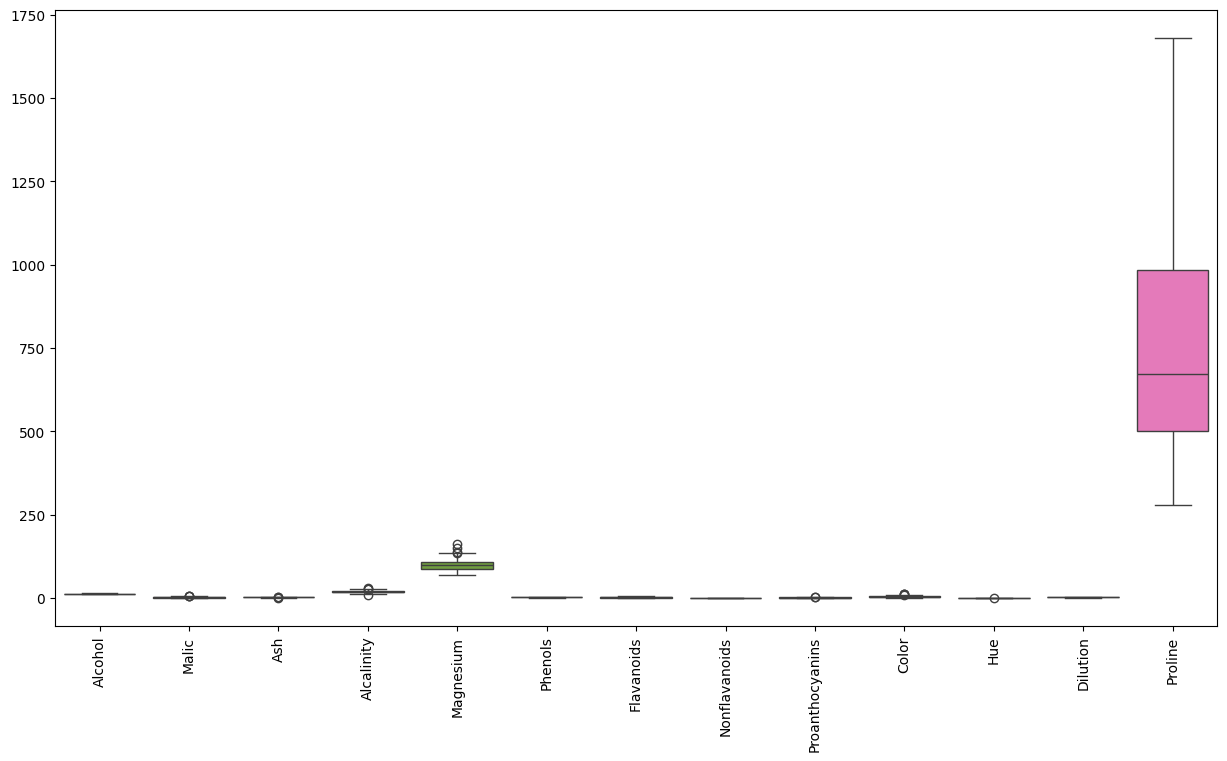

In [6]:
# Boxplot of all numerical variables
plt.figure(figsize=(15, 8))
sns.boxplot(df.iloc[:, 1:])
plt.xticks(rotation = 90)
plt.show()

There are only some outliers found in the Magnesium and Alcalinity columns. 

Alcohol: -0.051482331077134784
Malic: 1.0396511925814442
Ash: -0.17669931645735712
Alcalinity: 0.21304688642645586
Magnesium: 1.098191054755161
Phenols: 0.08663858640245253
Flavanoids: 0.02534355338149103
Nonflavanoids: 0.4501513355621236
Proanthocyanins: 0.5171371722998975
Color: 0.8685847909572548
Hue: 0.021091272199709302
Dilution: -0.30728549895848106
Proline: 0.7678217813897322


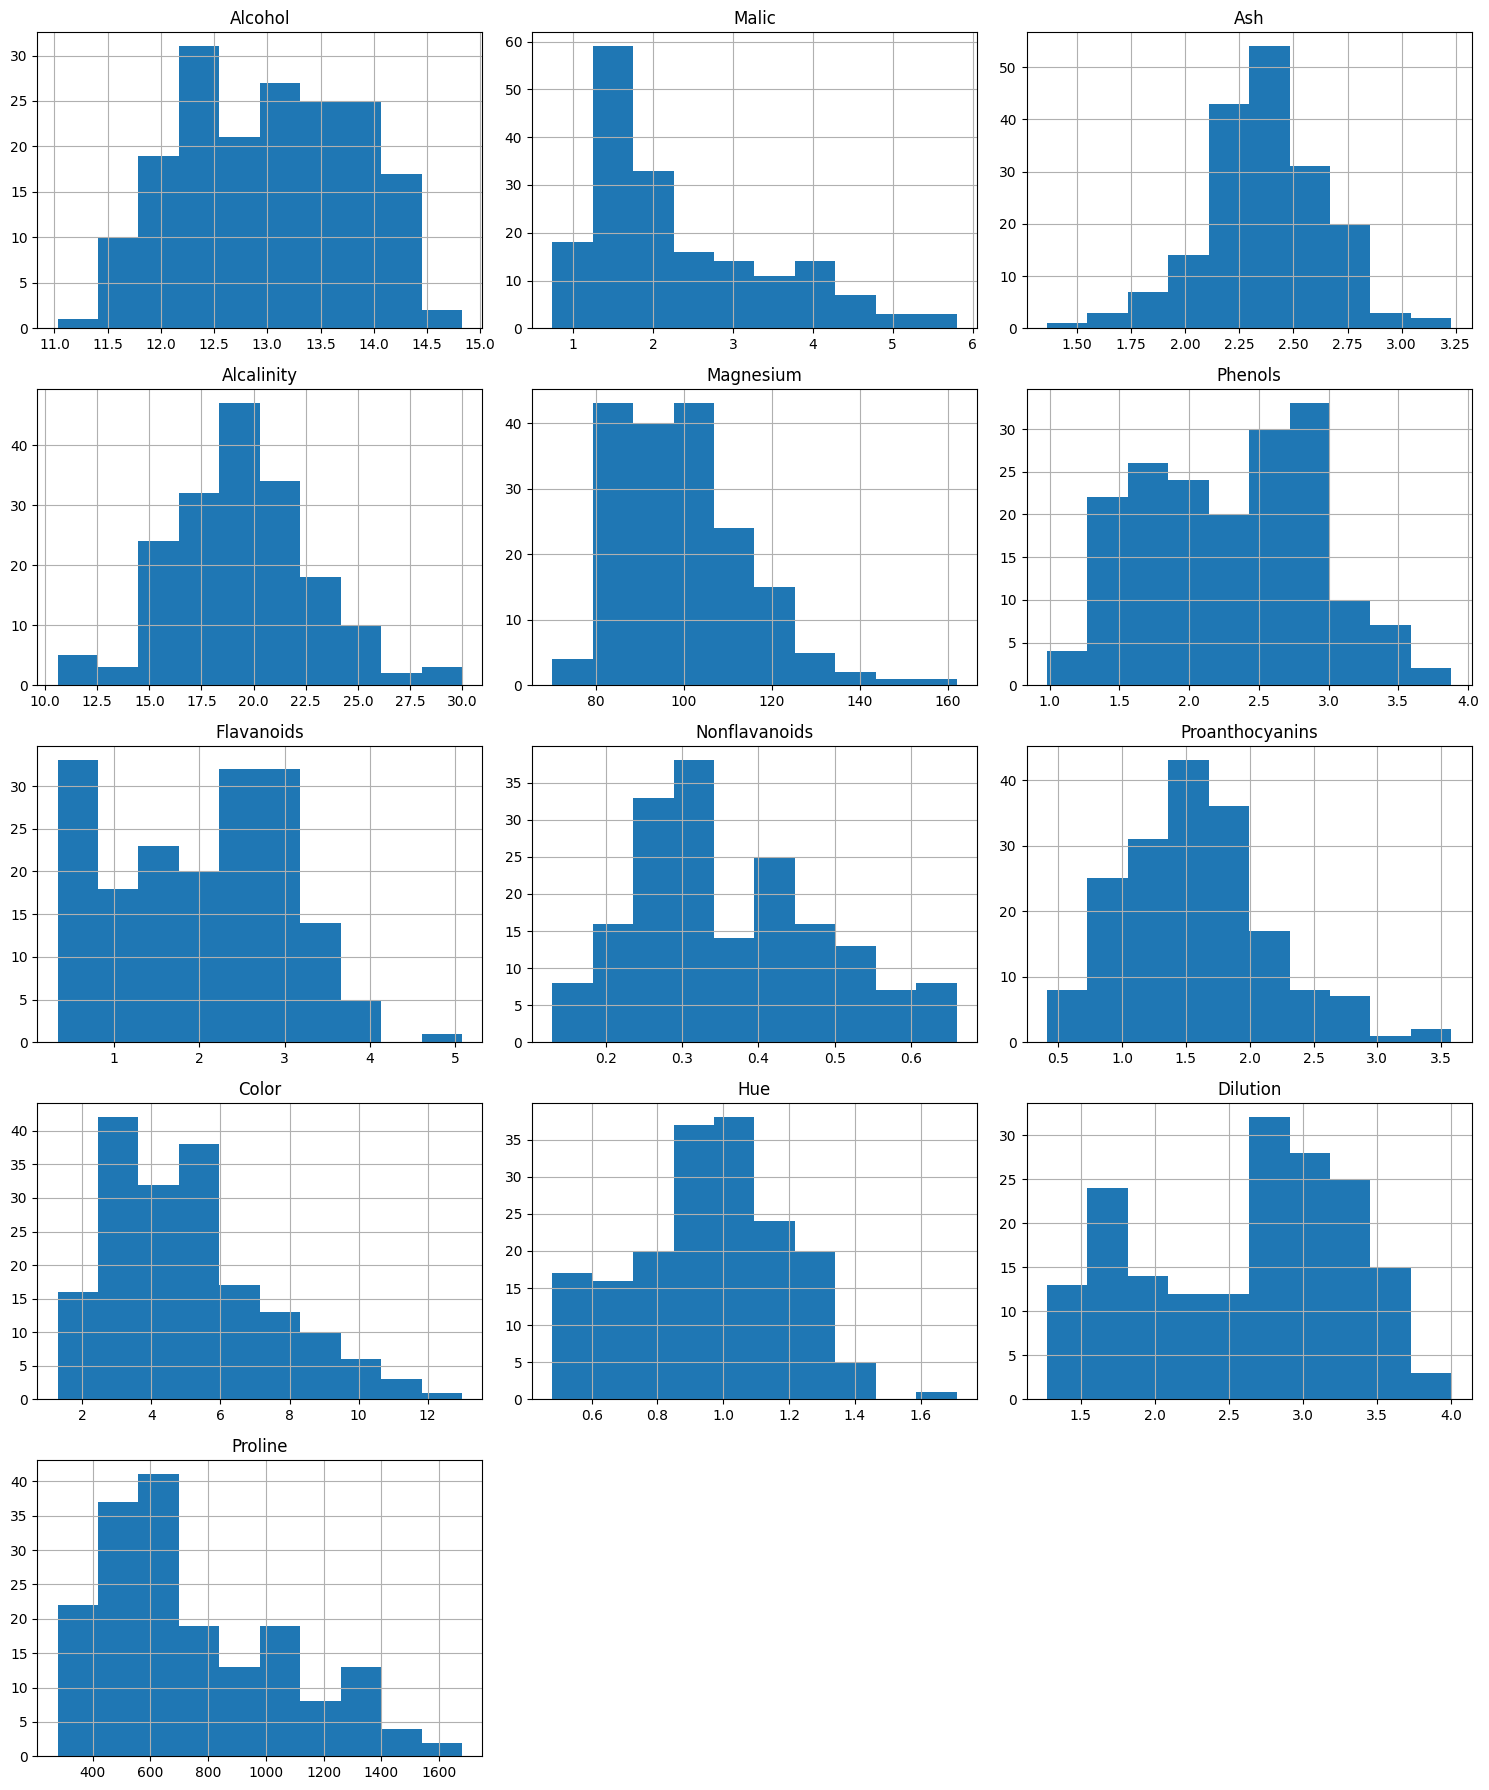

In [7]:
# Hisogram of all the numerical variables
df.iloc[:, 1:].hist(figsize=(15, 18), layout=(5, 3))
for i in df.iloc[:, 1:].columns:
    print(i+ ':', df[i].skew())
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

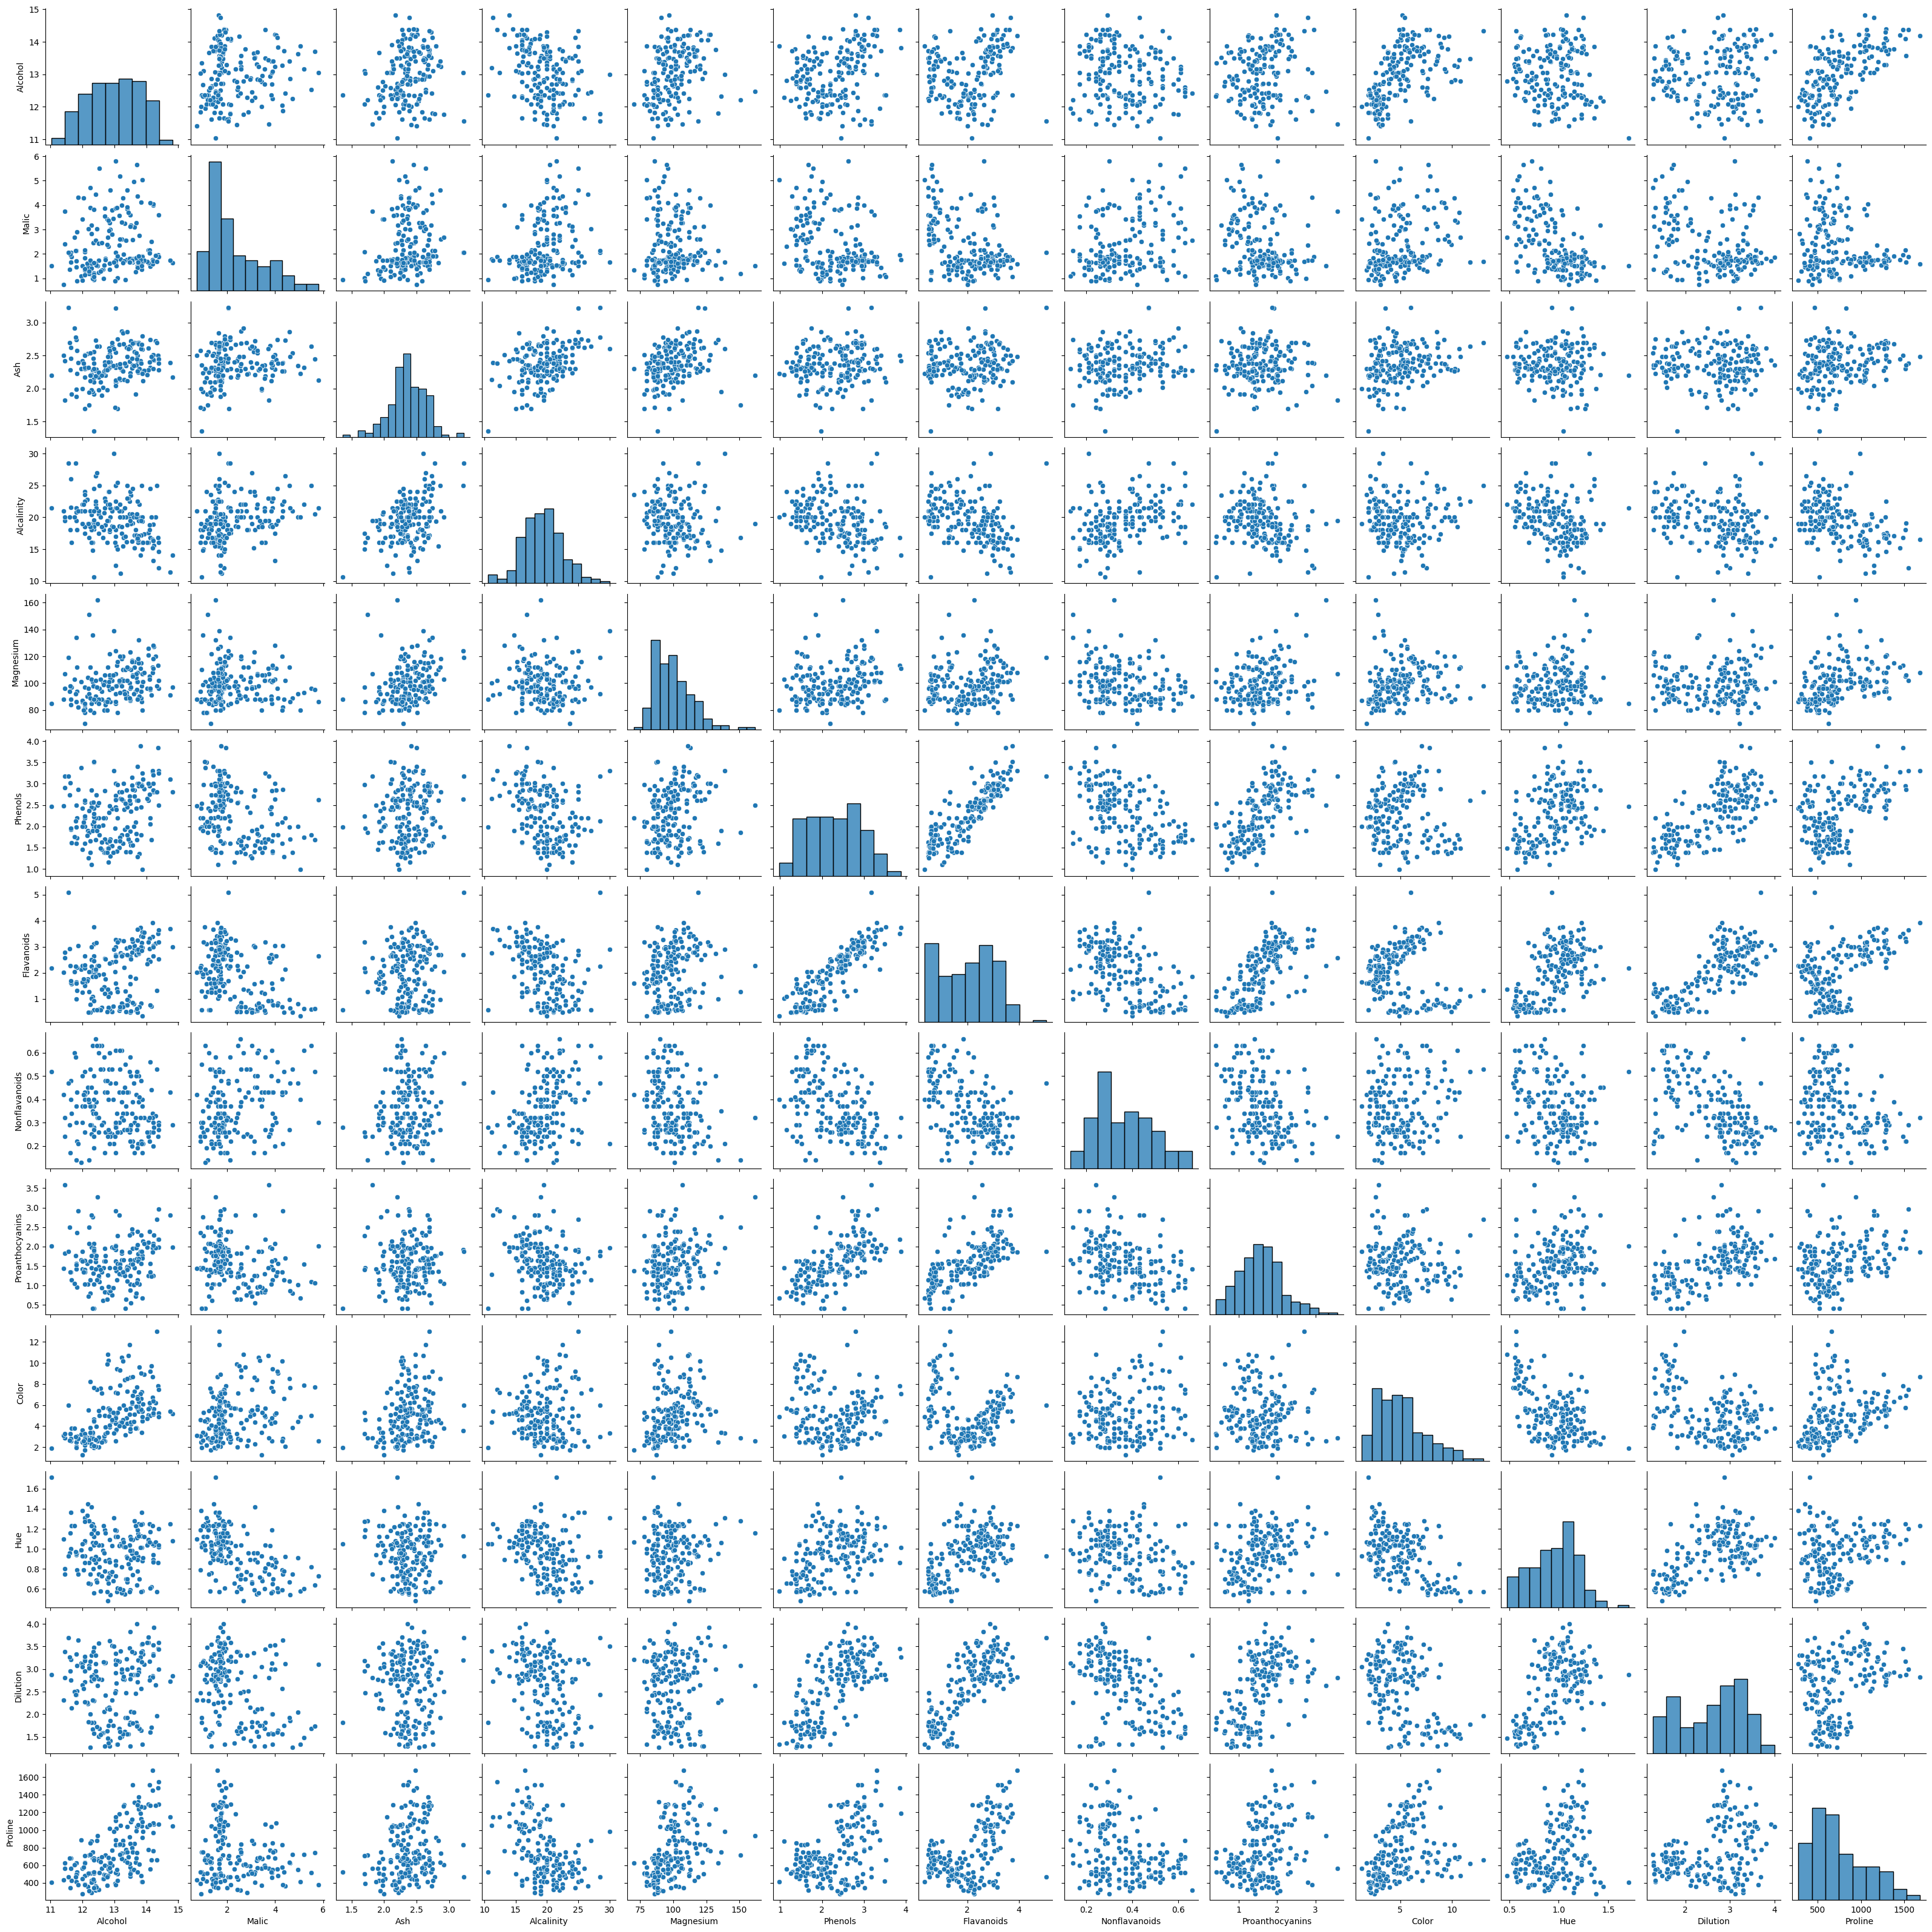

In [8]:
plt.figure(figsize=(15, 8))
sns.pairplot(df.iloc[:, 1:])
plt.show()

In [9]:
type_class = df.groupby('Type').mean()

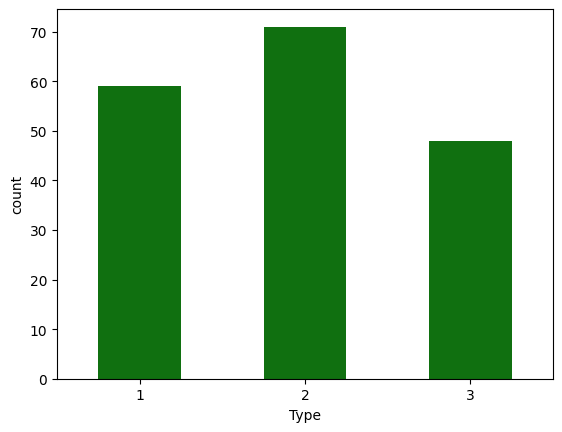

In [10]:
sns.countplot(df, x = 'Type', color='green', width=0.5)
plt.show()

Here, there are more data points which belongs to type - 2 category of wine.

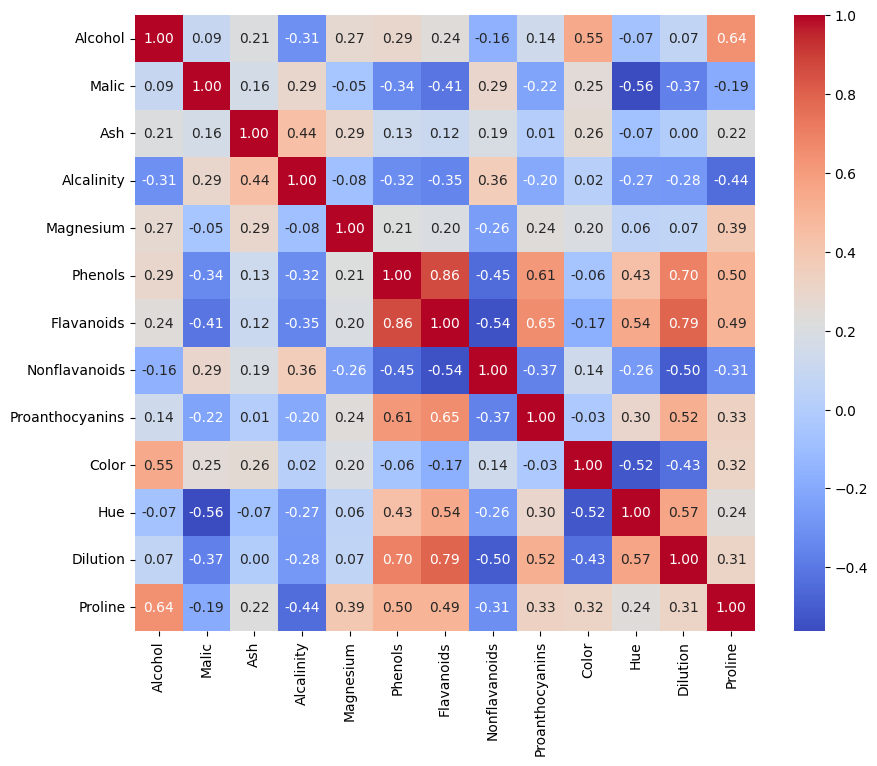

In [11]:
correlation = df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

There are some columns which are having more correlation within the X variables. They are ('Flavanoids', 'Phenols') and ('Flavanoids', 'Dilution').

#### Data Transformation

In [12]:
df_num = df.iloc[:, 1:]
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for i in df_num.columns:
    df_num[i] = SS.fit_transform(df_num[[i]])
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### 1. Kmeans Clustering Model

[2314.0000000000005, 1659.0079672511501, 1277.928488844642, 1197.2161544828477, 1121.3332511409365, 1100.1537456474416, 1038.9401071318423, 975.9157472956817, 945.0997317492398, 937.054602005431]


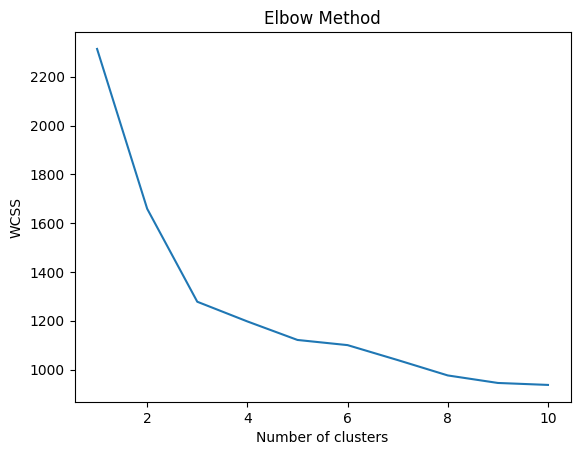

In [14]:
#WCSS (Within Cluster Sum of Squares)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_num)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

By observing from the Elbow chart, it can be decided that 3 cluster formation is best.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
df_num['kmeans'] = kmeans.fit_predict(df_num)


In [16]:
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [17]:
df_num['kmeans'].value_counts()

kmeans
0    65
2    62
1    51
Name: count, dtype: int64

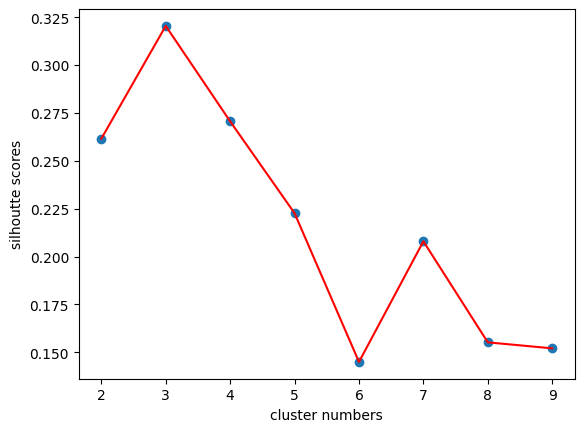

In [18]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,10):
    cluster = KMeans(n_clusters=i,n_init=20, random_state=42)
    df_num["Kmeans"] = cluster.fit_predict(df_num.iloc[:, :-1])
    Y = df_num["Kmeans"]
    scores.append(silhouette_score(df_num.iloc[:, :-1],Y))
    
    
import matplotlib.pyplot as plt
plt.scatter(range(2,10),scores)
plt.plot(range(2,10),scores,color='red')
plt.xlabel("cluster numbers")   
plt.ylabel("silhoutte scores")
plt.show()

The Silhouette score for the 3 cluster formation is highest among other cluster formation.

In [19]:
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans,Kmeans
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2,3
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2,3
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2,3
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2,3
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2,1


In [20]:
df_num.drop(df_num[['Kmeans']], axis=1, inplace=True)

### 2. Principal Component Analysis with Kmeans Clustering

In [21]:
pca = PCA()
pc = pca.fit_transform(df_num.iloc[:, :-1])
pc = pd.DataFrame(pc)
pc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [22]:
# Variances of all the principal components
for i in range(13):
    print('Variance:', pc.iloc[:, i].var())

Variance: 4.732436977583586
Variance: 2.511080929645122
Variance: 1.4542418678464635
Variance: 0.9241658668248737
Variance: 0.8580486765371104
Variance: 0.6452822124678536
Variance: 0.5541414662457828
Variance: 0.35046627494625343
Variance: 0.2905120326939772
Variance: 0.2523200103608248
Variance: 0.22706428173088497
Variance: 0.169723738980121
Variance: 0.10396199182075327


#### Explained Variance Ratio

In [23]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.361988
1,0.192075
2,0.111236
3,0.070690
4,0.065633
5,0.049358
6,0.042387
7,0.026807
8,0.022222
9,0.019300


In [24]:
# Excluding the columns with least variance ration of all columns
X_new = pc.iloc[:, :9]
X_new.head()

,0,1,2,3,4,5,6,7,8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
X_new['kmeans_pca'] = kmeans.fit_predict(X_new)
X_new['kmeans_pca'].value_counts()

C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\3586291239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['kmeans_pca'] = kmeans.fit_predict(X_new)


kmeans_pca
0    65
2    62
1    51
Name: count, dtype: int64

In [26]:
X_new.head()

,0,1,2,3,4,5,6,7,8,kmeans_pca
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,2
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,2
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,2
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,2
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,2


C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\1765752396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["kmeans_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\1765752396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["kmeans_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\1765752396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

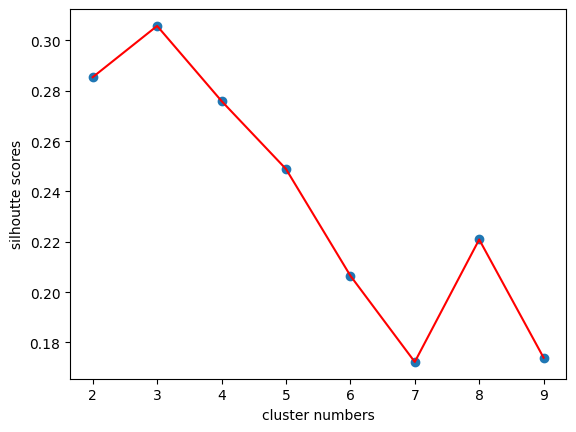

In [27]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,10):
    cluster = KMeans(n_clusters=i,n_init=20, random_state=42)
    X_new["kmeans_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
    Y = X_new["kmeans_pca"]
    scores.append(silhouette_score(X_new.iloc[:, :-1],Y))
    
    
import matplotlib.pyplot as plt
plt.scatter(range(2,10),scores)
plt.plot(range(2,10),scores,color='red')
plt.xlabel("cluster numbers")   
plt.ylabel("silhoutte scores")
plt.show()

#### 3. Hierarchical Clustering Model

1. Single Linkage method

In [28]:
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


Silhouette score for complete linkage: 0.1745


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


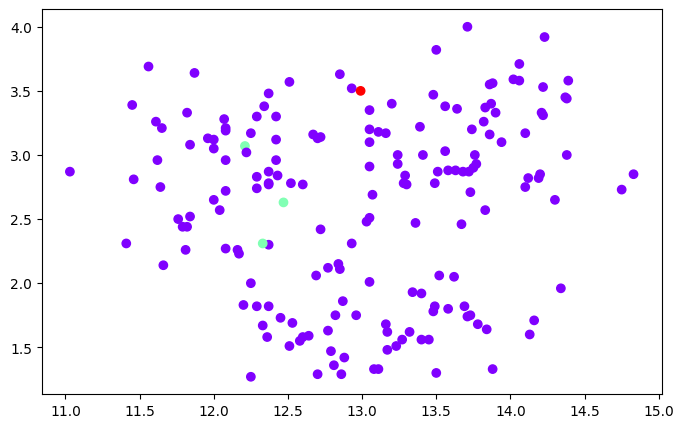

In [29]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'single')
df_num['Agg_cluster'] = cluster.fit_predict(df_num.iloc[:, :-1])

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, :-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [30]:
df_num['Agg_cluster'].value_counts()

Agg_cluster
0    174
1      3
2      1
Name: count, dtype: int64

2. Complete Linkage Method

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.2038
Agg_cluster
0    69
1    58
2    51
Name: count, dtype: int64


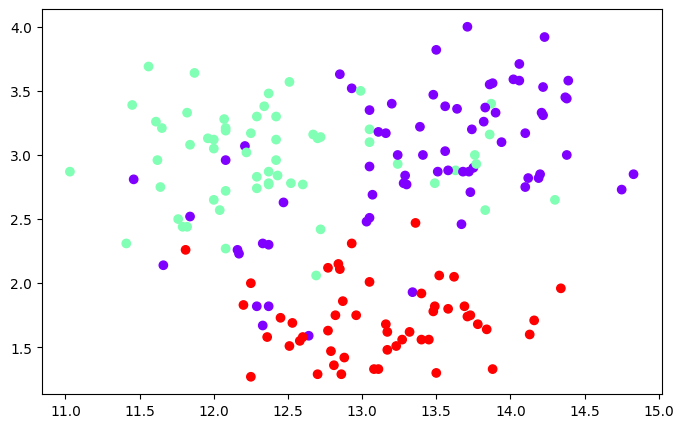

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
df_num['Agg_cluster'] = cluster.fit_predict(df_num.iloc[:, :-2])

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 0:-2], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(df_num['Agg_cluster'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

3. Average Linkage Method

Silhouette score for complete linkage: 0.1588
Agg_cluster
0    174
2      3
1      1
Name: count, dtype: int64


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


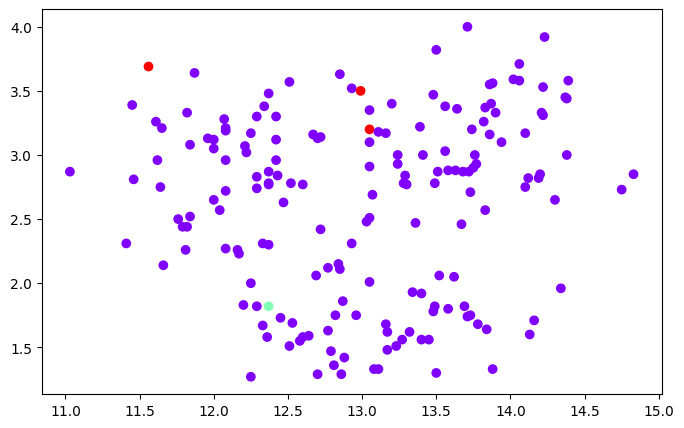

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'average')
df_num['Agg_cluster'] = cluster.fit_predict(df_num.iloc[:, :-2])

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(df_num['Agg_cluster'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

4. Ward Linkage Method

Silhouette score for complete linkage: 0.2908
Agg_cluster
2    64
0    58
1    56
Name: count, dtype: int64


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


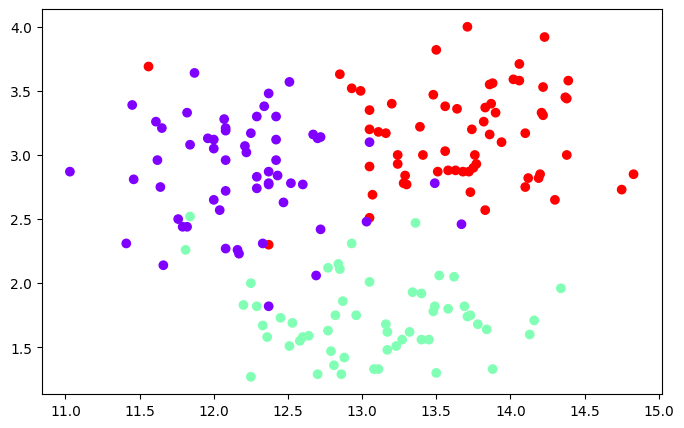

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
df_num['Agg_cluster'] = cluster.fit_predict(df_num.iloc[:, :-2])

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(df_num['Agg_cluster'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

Finalized model for Hierarchical Clustering

Silhouette scores: [0.2670131771272231, 0.2774439826952265, 0.225836659334758, 0.18674235566758707, 0.17966642854438503, 0.18685342560226942, 0.18834697102837825, 0.1917169293227209]


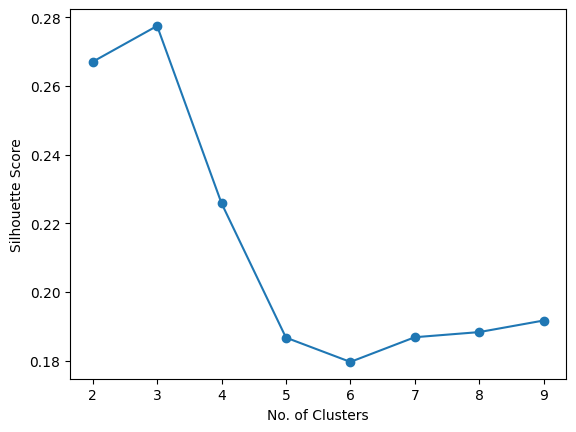

In [34]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'ward')
    df_num["Agg_cluster"] = cluster.fit_predict(df_num.iloc[:, :-2])
    Y = df_num['Agg_cluster']
    scores.append(silhouette_score(df_num.iloc[:, :-2],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The best cluster formation is 3 cluster for the ward linkage method.

#### 4. Heirarchical Clustering Model for PCA Components

In [35]:
df = pd.read_csv('wine.csv')
df.head()

df_num = df.iloc[:, 1:]
df_num.head()

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for i in df_num.columns:
    df_num[i] = SS.fit_transform(df_num[[i]])
df_num.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [42]:
pca = PCA()
pc = pca.fit_transform(df_num)
pc = pd.DataFrame(pc)

# Variances of all the principal components
for i in range(13):
    print('Variance:', pc.iloc[:, i].var())

pd.DataFrame(pca.explained_variance_ratio_)

# Excluding the columns with least variance ration of all columns
X_new = pc.iloc[:, :9]
X_new.head()

Variance: 4.732436977583586
Variance: 2.511080929645122
Variance: 1.4542418678464635
Variance: 0.9241658668248737
Variance: 0.8580486765371104
Variance: 0.6452822124678536
Variance: 0.5541414662457828
Variance: 0.35046627494625343
Variance: 0.2905120326939772
Variance: 0.2523200103608248
Variance: 0.22706428173088497
Variance: 0.169723738980121
Variance: 0.10396199182075327


,0,1,2,3,4,5,6,7,8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819


1. Single Linkage Method

C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\3977374537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.2169
Agg_cluster_pca
0    174
1      3
2      1
Name: count, dtype: int64


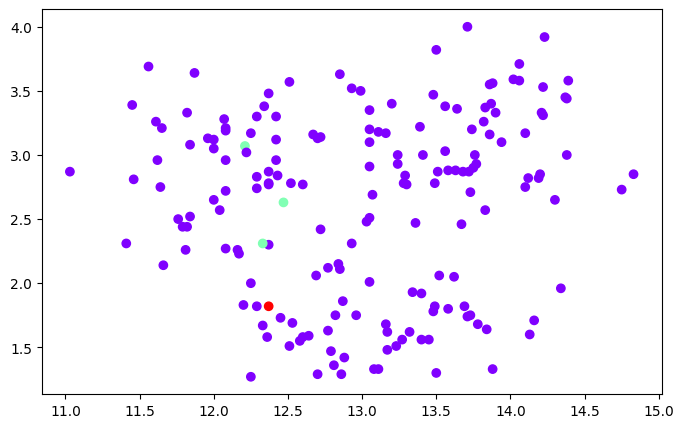

In [43]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'single')
X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new)

Y = X_new[['Agg_cluster_pca']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(X_new, Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(X_new['Agg_cluster_pca'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

2. Complete Linkage method

Silhouette score for complete linkage: 0.1653
Agg_cluster_pca
0    108
2     47
1     23
Name: count, dtype: int64


C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\2762401085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


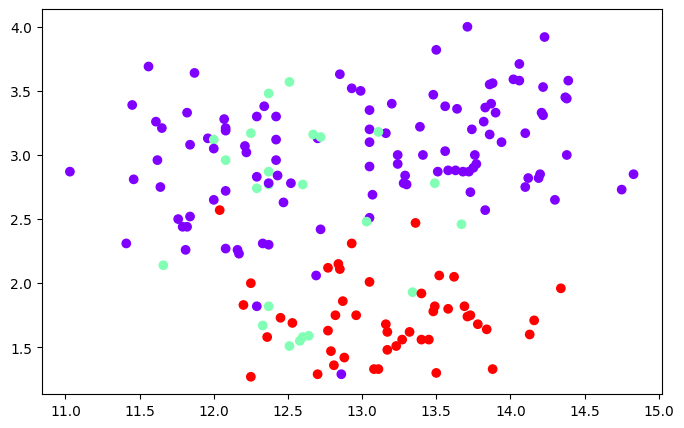

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])

Y = X_new[['Agg_cluster_pca']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(X_new.iloc[:, :-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(X_new['Agg_cluster_pca'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

3. Average Linkage Method

Silhouette score for complete linkage: 0.1544
Agg_cluster_pca
0    174
2      3
1      1
Name: count, dtype: int64


C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\1698166281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


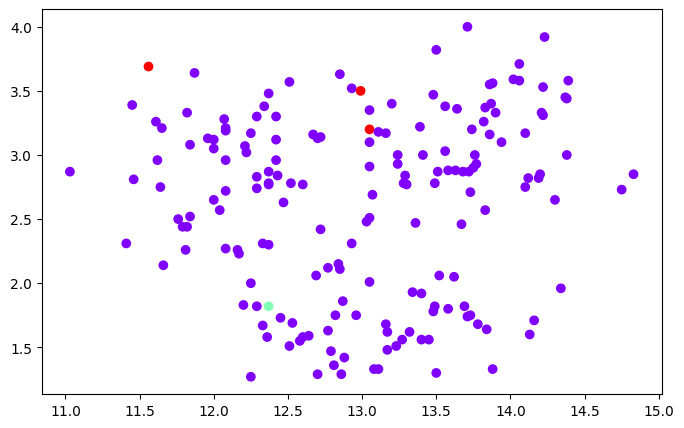

In [45]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'average')
X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])

Y = X_new[['Agg_cluster_pca']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(X_new.iloc[:, :-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))
print(X_new['Agg_cluster_pca'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

4. Ward Linkage Method

Silhouette score for complete linkage: 0.2883
Agg_cluster_pca
0    65
1    64
2    49
Name: count, dtype: int64


C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\1295330235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


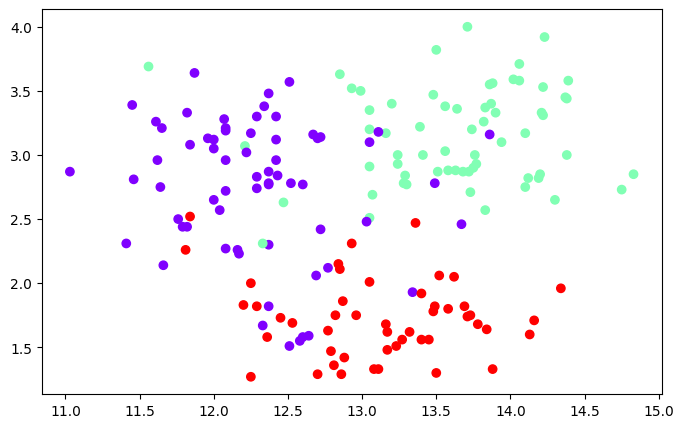

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
X_new['Agg_cluster_pca'] = cluster.fit_predict(X_new.iloc[:, :-1])

Y = X_new[['Agg_cluster_pca']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(X_new.iloc[:, :-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

print(X_new['Agg_cluster_pca'].value_counts())
plt.figure(figsize = (8, 5))
plt.scatter(df['Alcohol'], df['Dilution'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

Finalized Model of PCA with Hierarchical Clustering

C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\2124419164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["Agg_cluster_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\2124419164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new["Agg_cluster_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
C:\Users\cs833\AppData\Local\Temp\ipykernel_15224\2124419164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Silhouette scores: [0.26115055668127424, 0.28830538028996244, 0.2569991211857596, 0.25814854611805405, 0.23623366407245144, 0.20823576982350417, 0.21104588288004908, 0.21179616631148754]


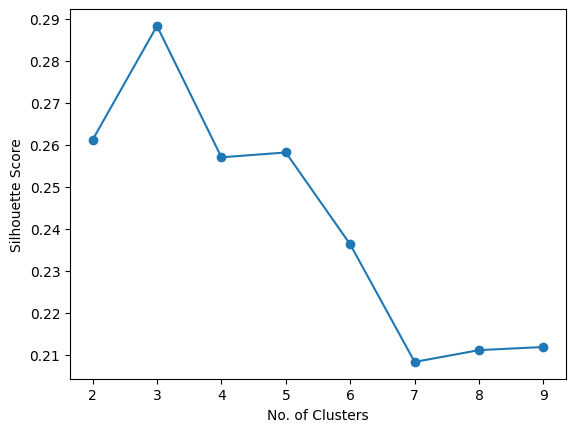

In [41]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'ward')
    X_new["Agg_cluster_pca"] = cluster.fit_predict(X_new.iloc[:, :-1])
    Y = X_new['Agg_cluster_pca']
    scores.append(silhouette_score(X_new.iloc[:, :-1],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

1. Both of the models, Kmeans Clustering and Kmeans CLustering with PCA models are resulting the same type of clusters as 3 cluster formation.

2. As we compare the kmeans clustering model with PCA model with Kmeans clustering, both of them are producing same results. 

3. But the difference between them is PCA model contains less number of columns compared to the Kmeans clustering model.

4. We can use the PCA method, when there are more X variables present in the dataset. It gives better results as well as with less number of columns.

5. Both of the models of Hierarchical Clustering and Hierarchical Clustering with PCA are forming 3 clusters with ward linkage method.